# Stock Market Prediction

## Importing Libraries

In [36]:
import numpy as np
import pandas as pd
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import yfinance as yf

from datetime import datetime

## Downloading Stock Info

In [5]:
#downloading stock information from yfinance
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

for stock in tech_list:
    globals()[stock]=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company,com_name in zip(company_list,company_name):
    company['company_name']=com_name
df=pd.concat(company_list,axis=0)

## Adj Close

The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. It is often used when examining historical returns or doing a detailed analysis of past performance. 

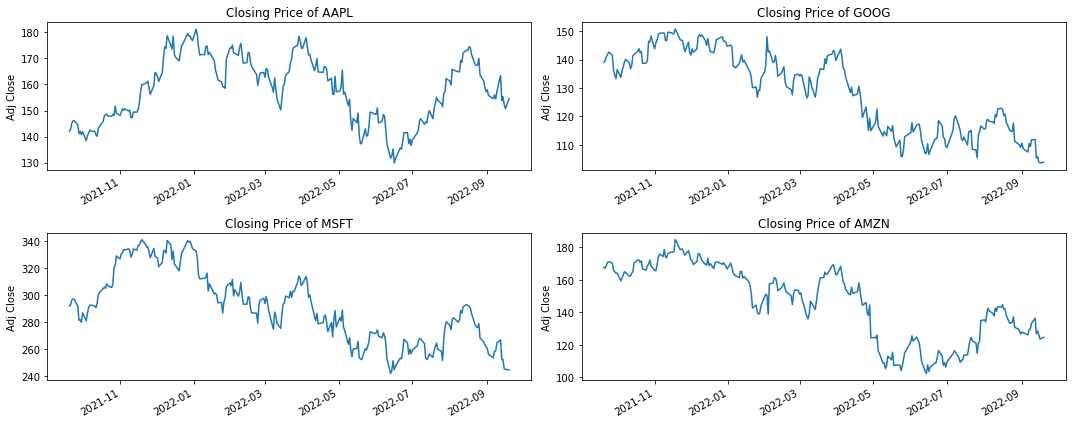

In [15]:
plt.figure(figsize=(15,6))
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of a stock traded 

Volume is an indicator that means the total number of shares that have been bought or sold in a specific period of time or during the trading day

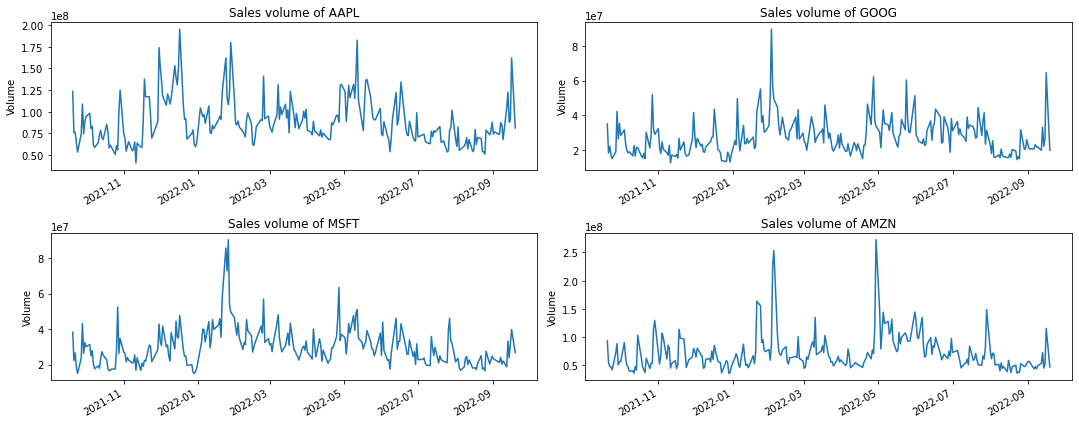

In [17]:
plt.figure(figsize=(15,6))
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales volume of {tech_list[i - 1]}")
    
plt.tight_layout()

## Moving Average

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [19]:
ma_day=[10,20,50]
for ma in ma_day:
    for company in company_list:
        col_name=f'MA for {ma} days'
        company[col_name]=company['Adj Close'].rolling(ma).mean()
        

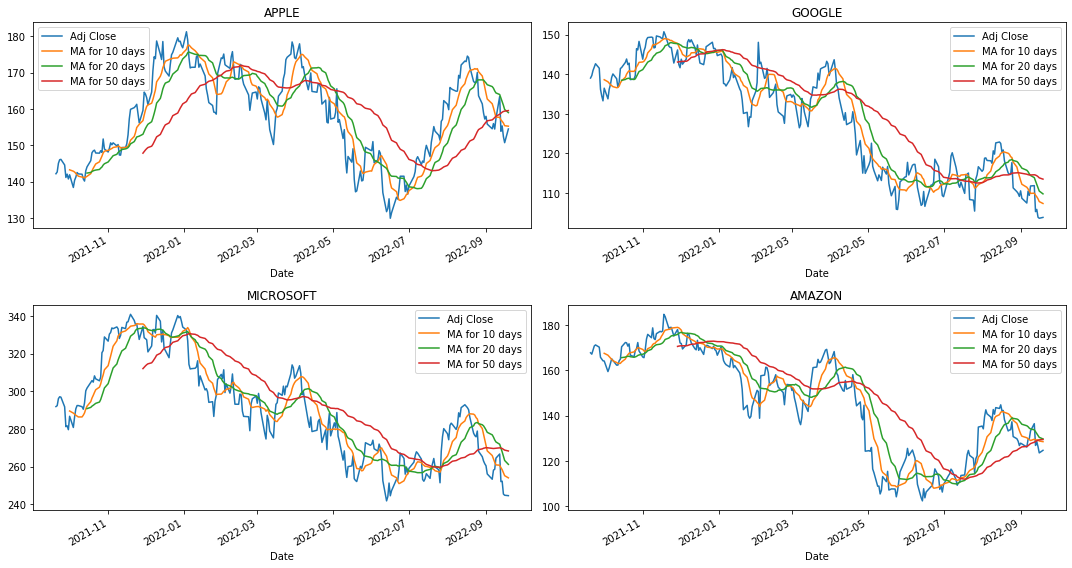

In [26]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Daily Returns

In [27]:
for company in company_list:
    company['Daily Return']=company['Adj Close'].pct_change()

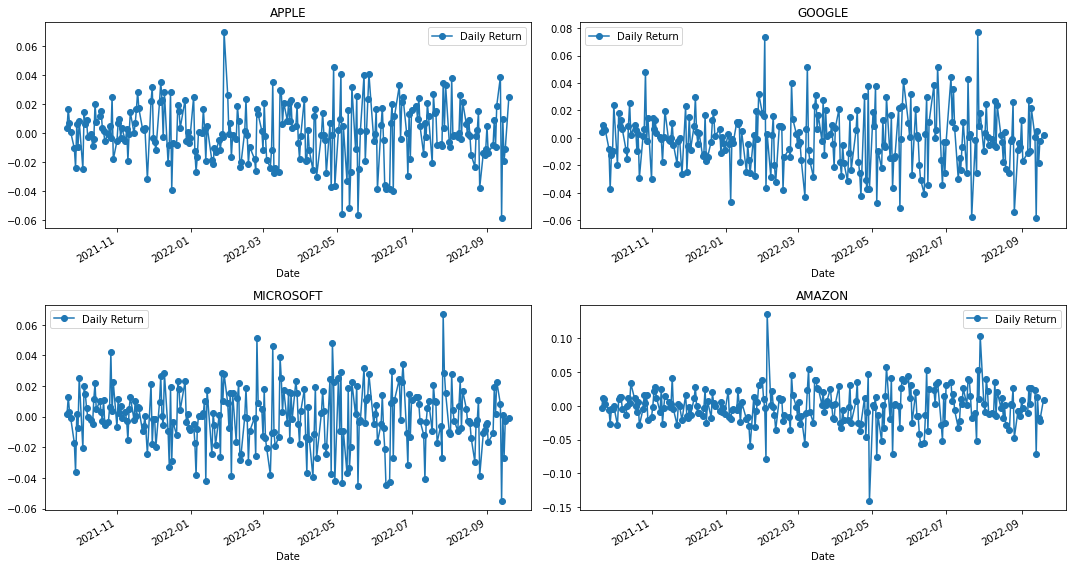

In [29]:
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0],legend=True,marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1],legend=True,marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0],legend=True,marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1],legend=True,marker='o')
axes[1,1].set_title('AMAZON')

plt.tight_layout()

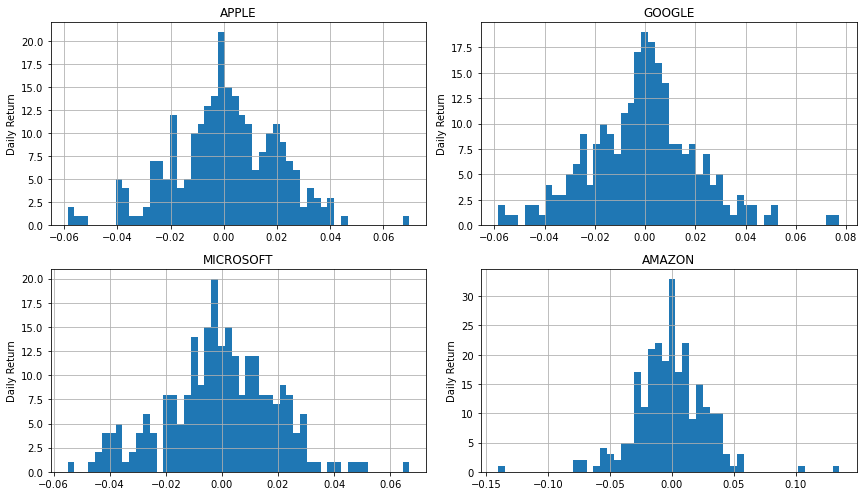

In [32]:
plt.figure(figsize=(12,7))
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i-1]}')
plt.tight_layout()

In [34]:
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-20,142.143494,139.016998,291.855652,167.786499
2021-09-21,142.630737,139.646500,292.351532,167.181503
2021-09-22,145.037292,140.938507,296.100098,169.002502
2021-09-23,146.011826,141.826508,297.072021,170.800003
2021-09-24,146.101318,142.632996,296.863739,171.276001


In [35]:
tech_rets=closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-20,NaN,NaN,NaN,NaN
2021-09-21,0.003428,0.004528,0.001699,-0.003606
2021-09-22,0.016873,0.009252,0.012822,0.010892
2021-09-23,0.006719,0.006301,0.003282,0.010636
2021-09-24,0.000613,0.005686,-0.000701,0.002787


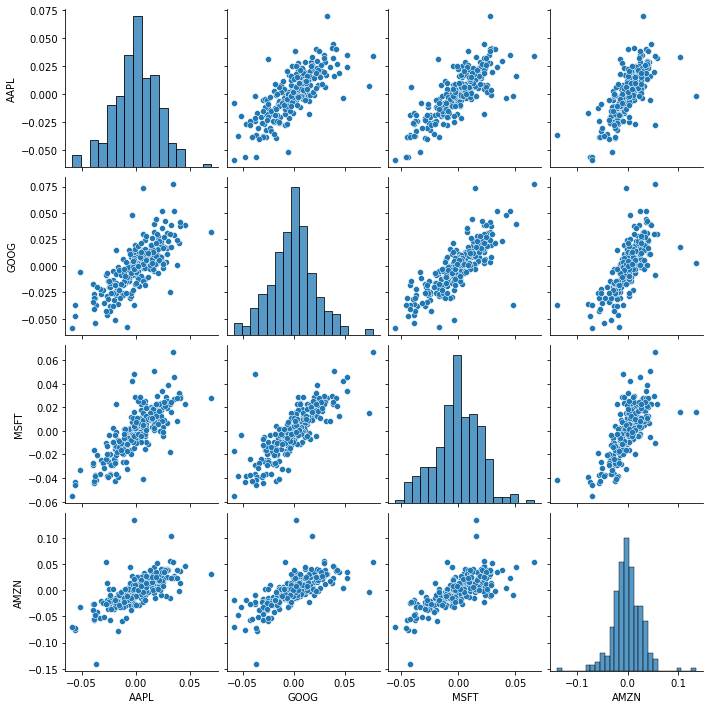

In [37]:
sns.pairplot(tech_rets)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

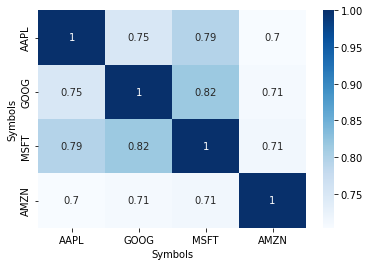

In [46]:
sns.heatmap(tech_rets.corr(),annot=True,cmap='Blues')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

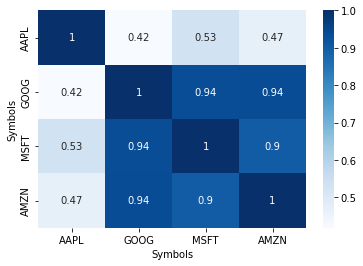

In [47]:
sns.heatmap(closing_df.corr(),annot=True,cmap='Blues')

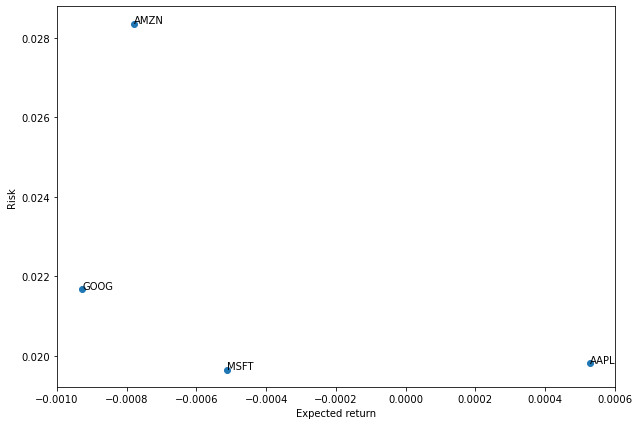

In [54]:
rets=tech_rets.dropna()
plt.figure(figsize=(10,7))
plt.scatter(rets.mean(),rets.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y))

In [55]:
df=DataReader('AAPL',data_source='yahoo',start='2012-01-01',end=datetime.now())

In [56]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540048
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607438
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880667
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860235


Text(0, 0.5, 'Closing Price in USD($)')

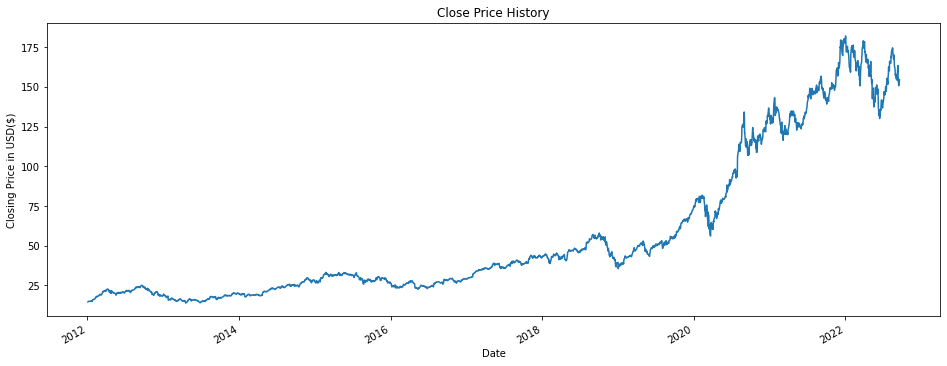

In [59]:
plt.figure(figsize=(16,6))
df['Close'].plot()
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD($)')


In [60]:
data=df.filter(['Close'])

dataset=data.values
#95% of whole
training_data_len=int(np.ceil(len(dataset)*.95))

In [61]:
training_data_len

2563

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)


In [63]:
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.81370027],
       [0.83619189],
       [0.83529877]])

In [64]:
train_data=scaled_data[0:int(training_data_len),:]

In [65]:
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [69]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x_train,y_train,batch_size=1,epochs=1)

2022-09-20 23:16:04.585697: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-20 23:16:04.585753: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-20 23:16:04.585806: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ashpheonix-HP-Notebook): /proc/driver/nvidia/version does not exist
2022-09-20 23:16:04.587185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2503/2503 [==============================] - 97s 37ms/step - loss: 0.0016


In [70]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 2s 54ms/step


5.093245240071989

/tmp/ipykernel_4763/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


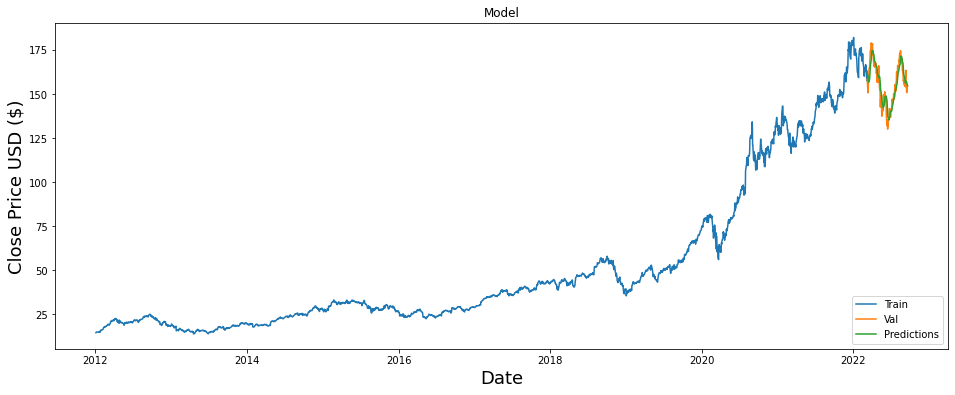

In [71]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()